In [1]:
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
#import tensorflow.keras.utils
from keras.preprocessing.image import ImageDataGenerator
#from keras_preprocessing.image import load_img
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten
from keras.optimizers import RMSprop,SGD, Adam
from keras import regularizers
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
from keras.utils import plot_model
#from keras_preprocessing.image import load_img
from tensorflow.keras.utils import load_img
#from tensorflow.keras.utils import ImageDataGenerator

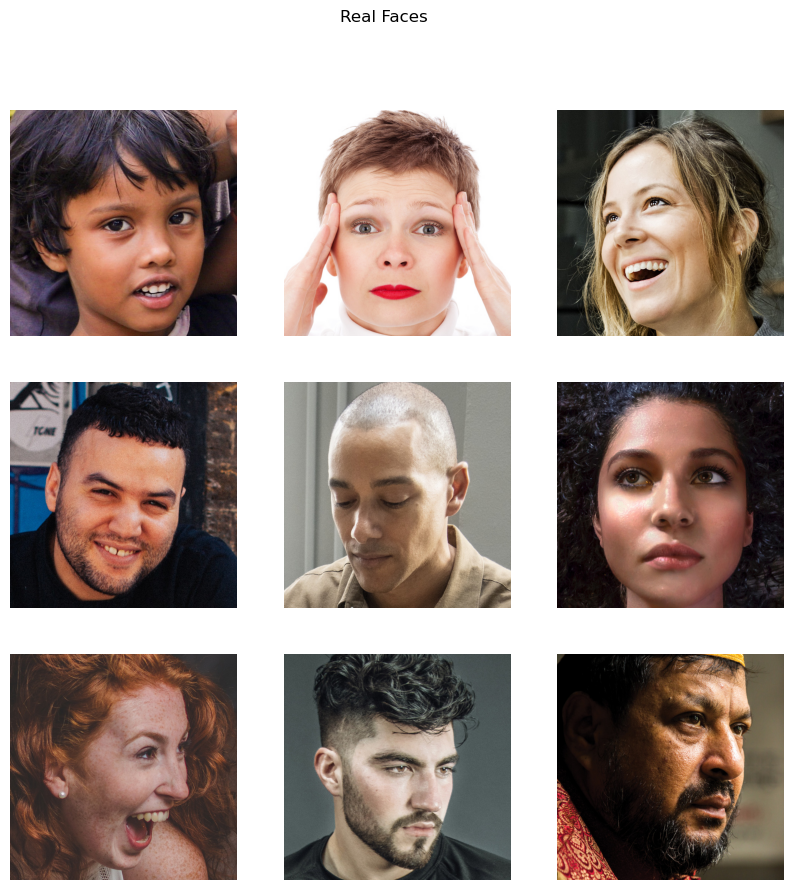

In [2]:
train_fake = '../Project/real_and_fake_face/training_fake/'
train_real = '../Project/real_and_fake_face/training_real/'

def plot_image(path, title):
    plt.figure(figsize=(10,10))
    for i in range(9):
        img = load_img(path +'/' +os.listdir(path)[i])
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        if title=='Fake Faces':
            plt.title(os.listdir(path)[i][:4])
        plt.suptitle(title)
        plt.axis('off')
    return plt
plot_image(train_real, 'Real Faces').show()

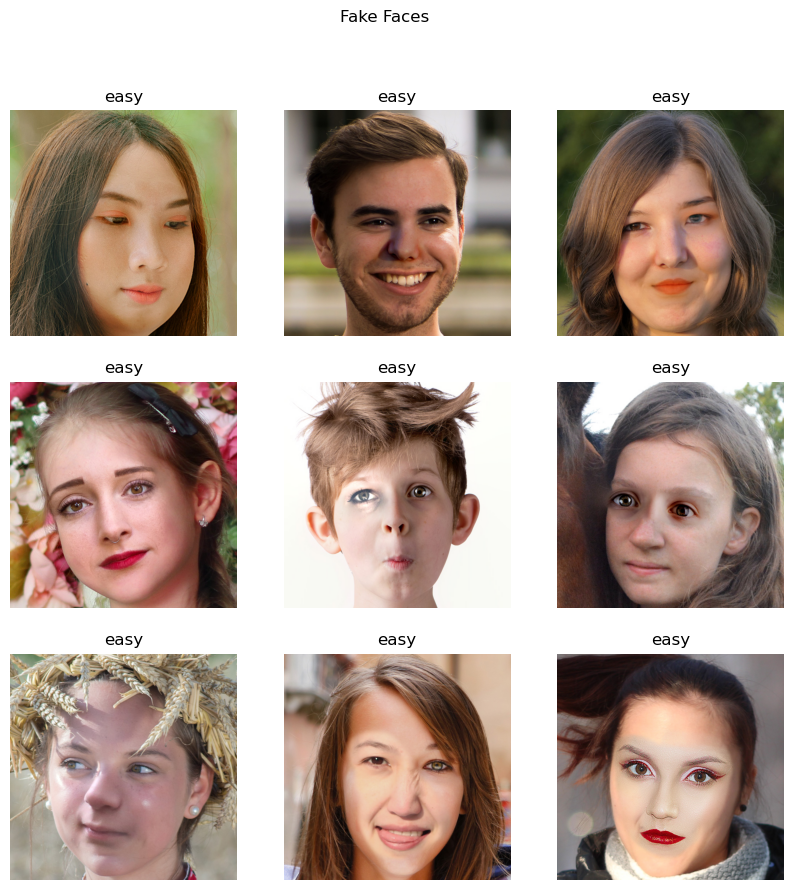

In [3]:
plot_image(train_fake, 'Fake Faces').show()

In [4]:
path_data = '../Project/real_and_fake_face/'
data_gen = ImageDataGenerator(rescale=1./255,
                              horizontal_flip=True,
                              zoom_range=0.2,
                              rotation_range=20,
                              shear_range=0.3,
                              width_shift_range=0.2,
                             )
training_set = data_gen.flow_from_directory(path_data,
                                            class_mode='binary',
                                            shuffle=True,
                                            target_size=(96,96),
                                            batch_size=64,
                                           )

training_set.class_indices

Found 2041 images belonging to 2 classes.


{'training_fake': 0, 'training_real': 1}

In [11]:
import keras
import keras.utils
from keras import utils as np_utils
mobilenet = MobileNetV2(input_shape=(96, 96, 3),
                        include_top=False,
                        weights='imagenet'
                       )
model = tf.keras.models.Sequential([mobilenet,
                                    GlobalAveragePooling2D(),
                                    Dense(512, activation='relu'),
                                    BatchNormalization(),
                                    Dropout(0.3),
                                    Dense(1, activation='sigmoid')
                                   ])
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )


model.summary()
#keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

In [6]:
hist = model.fit(x=training_set, epochs=15)

Epoch 1/15
32/32 [==============================] - 67s 2s/step - loss: 1.1550 - accuracy: 0.5233
Epoch 2/15
32/32 [==============================] - 74s 2s/step - loss: 0.8189 - accuracy: 0.5963
Epoch 3/15
32/32 [==============================] - 79s 2s/step - loss: 0.6761 - accuracy: 0.6487
Epoch 4/15
32/32 [==============================] - 54s 2s/step - loss: 0.6502 - accuracy: 0.6605
Epoch 5/15
32/32 [==============================] - 52s 2s/step - loss: 0.6213 - accuracy: 0.6830
Epoch 6/15
32/32 [==============================] - 52s 2s/step - loss: 0.5644 - accuracy: 0.7144
Epoch 7/15
32/32 [==============================] - 53s 2s/step - loss: 0.5590 - accuracy: 0.7320
Epoch 8/15
32/32 [==============================] - 52s 2s/step - loss: 0.4893 - accuracy: 0.7658
Epoch 9/15
32/32 [==============================] - 822s 26s/step - loss: 0.4722 - accuracy: 0.7810
Epoch 10/15
32/32 [==============================] - 53s 2s/step - loss: 0.4338 - accuracy: 0.7967
Epoch 11/15
32/32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


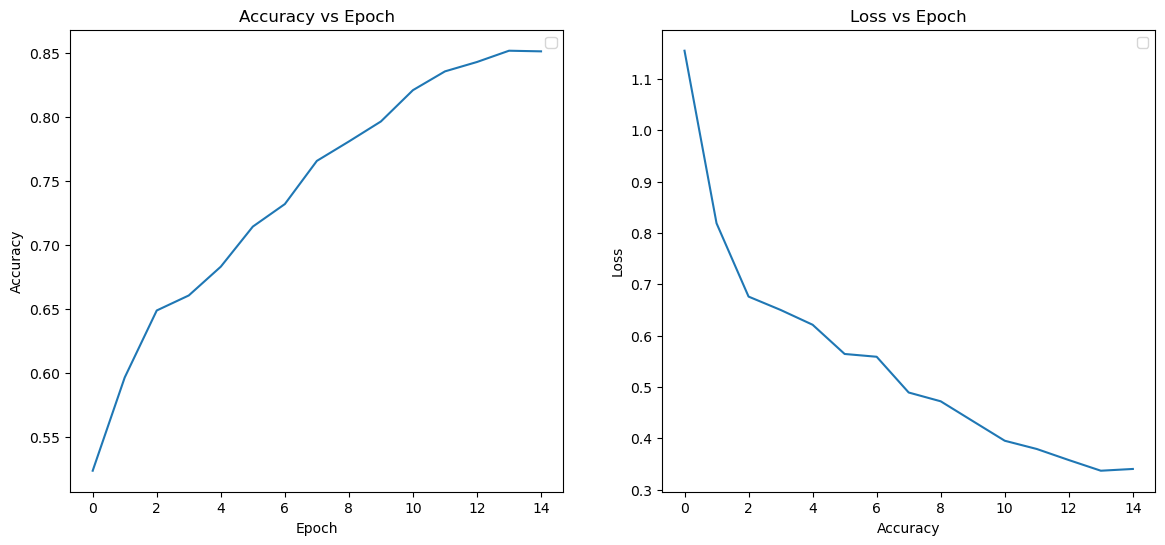

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
y_pred = model.predict(training_set)
y_pred = (y_pred < 0.5).astype(np.int)

from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)

print('Classification Report')
print(classification_report(training_set.classes, y_pred, target_names=['fake', 'real']))



32/32 [==============================] - 29s 830ms/step


C:\Users\sahan\AppData\Local\Temp\ipykernel_23704\3923385278.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (y_pred < 0.5).astype(np.int)


Confusion Matrix
[[ 917   43]
 [1038   43]]
Classification Report
              precision    recall  f1-score   support

        fake       0.47      0.96      0.63       960
        real       0.50      0.04      0.07      1081

    accuracy                           0.47      2041
   macro avg       0.48      0.50      0.35      2041
weighted avg       0.49      0.47      0.33      2041

